<a href="https://colab.research.google.com/github/sainisatish/DeepLearningFromScratch/blob/main/Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
#A quick hello Wolrd program of deep learning

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_img,train_labels),(test_img,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f'train img shape : {train_img.shape} , train_img_labels : {train_labels.shape}')

train img shape : (60000, 28, 28) , train_img_labels : (60000,)


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([layers.Dense(512,activation="relu"),
                          layers.Dense(10,activation= "softmax")])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
train_img = train_img.reshape((60000,28*28))
train_img = train_img.astype('float32')/255

test_img = test_img.reshape((10000,28*28))
test_img = test_img.astype('float32')/255

In [ ]:
model.fit(train_img,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2596 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1033 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0679 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0484 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0360 - accuracy: 0.9887


In [ ]:
print(f'test img shape : {test_img.shape} , test_img_labels : {test_labels.shape}')

test img shape : (10000, 784) , test_img_labels : (10000,)


In [ ]:
test = test_img[0:10]

In [ ]:
test_result = model.predict(test)

1/1 [==============================] - 0s 75ms/step


In [ ]:
  test_result

array([[2.5874673e-08, 7.2433387e-10, 2.2465156e-06, 2.7068334e-05,
        8.2597202e-12, 2.2069342e-09, 1.1689496e-14, 9.9996954e-01,
        1.4963386e-07, 8.8393369e-07],
       [7.5208607e-12, 8.4597520e-09, 9.9999994e-01, 1.2850393e-08,
        1.9861035e-18, 7.4141790e-09, 2.2234010e-11, 2.4507265e-16,
        5.7249729e-09, 5.1503646e-17],
       [1.1960118e-07, 9.9939072e-01, 3.5172896e-05, 4.8421734e-06,
        5.2276482e-05, 5.1082811e-06, 8.1335429e-06, 1.0956497e-04,
        3.9109983e-04, 2.8875859e-06],
       [9.9993867e-01, 5.4301635e-10, 2.3519431e-05, 1.2769287e-06,
        6.8293389e-08, 4.8787870e-06, 2.1108050e-05, 7.4742916e-06,
        1.9609974e-09, 2.9819275e-06],
       [2.0433542e-07, 1.3004431e-10, 2.4595231e-06, 4.6434976e-09,
        9.9883670e-01, 4.1685735e-07, 4.9874404e-07, 5.2891311e-05,
        9.9695887e-07, 1.1057183e-03],
       [4.3674142e-10, 9.9990636e-01, 1.2338701e-07, 1.2834869e-07,
        9.4781371e-06, 5.4964926e-09, 1.1142255e-08, 7.41

In [ ]:
test_result[5].argmax()

1

In [ ]:
test_loss,test_acc = model.evaluate(test_img,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9807


In [ ]:
print(f"test Accuracy: { test_acc}")

test Accuracy: 0.9807000160217285


In [ ]:
#Now Deep Diving into DL

**Tensor**

1-Scalar: a tensor which contain only single number is called as scalar, it have 0 axes so it is rank 0 tensor.

2-Vector: a tensor which cotain only array of number is called as vector, it have 1 axes so it is rank 1 tensor.

3-Metrics: a tensor which contain only array of vectors is called as metrics, it have 2 axes so it is rank 2 tensor.

4-Rank 3 and higher rank tensors: array of metrics.

**Attributes**

Number of axes

Shape

Datatype

**Note**

Model don't process all data in one time , it create batches of images.
like we have used bacth_size parameter to 

In [19]:
# Linear classifier in Tensorflow
#first generate two classes

sample_per_class = 1000

neg_sample = np.random.multivariate_normal(mean=[0,3],
                                           cov = [[1,0.5],[0.5,1]],
                                           size = sample_per_class)

pos_sample = np.random.multivariate_normal(mean=[3,0],
                                           cov = [[1,0.5],[0.5,1]],
                                           size = sample_per_class)

In [20]:
inputs = np.vstack((neg_sample,pos_sample)).astype('float32')

In [21]:
targets= np.vstack((np.ones((sample_per_class,1),dtype = 'float32'),np.zeros((sample_per_class,1),dtype = 'float32')))

In [22]:
x= inputs[:,0]
y= inputs[:,1]

In [8]:
from matplotlib import pyplot as plt

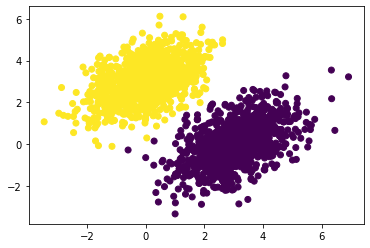

In [23]:
plt.scatter(x,y,c=targets[:,0])
plt.show()

In [ ]:
#We All Know Below Equations
#PREDICTION = W.X+B
#y = mx+c

In [24]:
input_dim = 2
output_dim = 1

In [11]:
w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=output_dim))

In [12]:
def model(inputs):
    return tf.matmul(inputs,w)+b

In [16]:
def square_loss(targets,prediction):
    per_sample_loss = tf.square(targets - prediction)
    return tf.reduce_mean(per_sample_loss)


In [17]:
learning_rate = 0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        prediction = model(inputs)
        loss = square_loss(targets,prediction)

    gradient_loss_wrt_w, gradient_loss_wrt_b = tape.gradient(loss, [w,b])
    w.assign_sub(gradient_loss_wrt_w*learning_rate)
    b.assign_sub(gradient_loss_wrt_b*learning_rate)
    return loss


In [18]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.9409
Loss at step 1: 0.3189
Loss at step 2: 0.1438
Loss at step 3: 0.1183
Loss at step 4: 0.1086
Loss at step 5: 0.1011
Loss at step 6: 0.0944
Loss at step 7: 0.0883
Loss at step 8: 0.0828
Loss at step 9: 0.0777
Loss at step 10: 0.0731
Loss at step 11: 0.0689
Loss at step 12: 0.0651
Loss at step 13: 0.0616
Loss at step 14: 0.0584
Loss at step 15: 0.0556
Loss at step 16: 0.0529
Loss at step 17: 0.0505
Loss at step 18: 0.0483
Loss at step 19: 0.0463
Loss at step 20: 0.0445
Loss at step 21: 0.0429
Loss at step 22: 0.0413
Loss at step 23: 0.0400
Loss at step 24: 0.0387
Loss at step 25: 0.0376
Loss at step 26: 0.0365
Loss at step 27: 0.0356
Loss at step 28: 0.0347
Loss at step 29: 0.0339
Loss at step 30: 0.0332
Loss at step 31: 0.0326
Loss at step 32: 0.0320
Loss at step 33: 0.0314
Loss at step 34: 0.0309
Loss at step 35: 0.0305
Loss at step 36: 0.0301
Loss at step 37: 0.0297
Loss at step 38: 0.0294
Loss at step 39: 0.0291
